In [ ]:
import csv

class TreeNode:
    def __init__(self, atribut=None, is_leaf=False, rekomendasi=None):
        self.atribut = atribut
        self.branches = {}
        self.is_leaf = is_leaf
        self.rekomendasi = rekomendasi

    def add_branch(self, atribut_value, node):
        self.branches[atribut_value] = node

class DecisionTree:
    def __init__(self):
        self.root = None

    def buat_tree(self, data):
        self.root = self._buat_custom_tree(data)

    def _buat_custom_tree(self, data):
        root = TreeNode(atribut="Usia")
        usia_groups = {}

        for item in data:
            usia = item["Usia"]
            if usia not in usia_groups:
                usia_groups[usia] = []
            usia_groups[usia].append(item)

        for usia, usia_data in usia_groups.items():
            kategori_node = TreeNode(atribut="Kategori")
            kategori_groups = {}
            for item in usia_data:
                kategori = item["Kategori"]
                if kategori not in kategori_groups:
                    kategori_groups[kategori] = []
                kategori_groups[kategori].append(item)

            for kategori, kategori_data in kategori_groups.items():
                if kategori == "Fiksi":
                    genre_node = TreeNode(atribut="Genre")
                    genre_groups = {}
                    for item in kategori_data:
                        genre = item["Genre"]
                        if genre not in genre_groups:
                            genre_groups[genre] = []
                        genre_groups[genre].append(item)

                    for genre, genre_data in genre_groups.items():
                        halaman_node = TreeNode(atribut="Banyak halaman")
                        halaman_groups = {}
                        for item in genre_data:
                            halaman = item["Banyak halaman"]
                            if halaman not in halaman_groups:
                                halaman_groups[halaman] = []
                            halaman_groups[halaman].append(item)

                        for halaman, halaman_data in halaman_groups.items():
                            bahasa_node = TreeNode(atribut="Bahasa")
                            bahasa_groups = {}
                            for item in halaman_data:
                                bahasa = item["Bahasa"]
                                if bahasa not in bahasa_groups:
                                    bahasa_groups[bahasa] = []
                                bahasa_groups[bahasa].append(item)

                            for bahasa, bahasa_data in bahasa_groups.items():
                                leaf_node = TreeNode(is_leaf=True, rekomendasi=bahasa_data[0]["Rekomendasi Buku"])
                                bahasa_node.add_branch(bahasa, leaf_node)

                            halaman_node.add_branch(halaman, bahasa_node)

                        genre_node.add_branch(genre, halaman_node)

                    kategori_node.add_branch(kategori, genre_node)

                elif kategori == "Nonfiksi":
                    genre_node = TreeNode(atribut="Genre")
                    genre_groups = {}
                    for item in kategori_data:
                        genre = item["Genre"]
                        if genre not in genre_groups:
                            genre_groups[genre] = []
                        genre_groups[genre].append(item)

                    for genre, genre_data in genre_groups.items():
                        halaman_node = TreeNode(atribut="Banyak halaman")
                        halaman_groups = {}
                        for item in genre_data:
                            halaman = item["Banyak halaman"]
                            if halaman not in halaman_groups:
                                halaman_groups[halaman] = []
                            halaman_groups[halaman].append(item)

                        for halaman, halaman_data in halaman_groups.items():
                            bahasa_node = TreeNode(atribut="Bahasa")
                            bahasa_groups = {}
                            for item in halaman_data:
                                bahasa = item["Bahasa"]
                                if bahasa not in bahasa_groups:
                                    bahasa_groups[bahasa] = []
                                bahasa_groups[bahasa].append(item)

                            for bahasa, bahasa_data in bahasa_groups.items():
                                leaf_node = TreeNode(is_leaf=True, rekomendasi=bahasa_data[0]["Rekomendasi Buku"])
                                bahasa_node.add_branch(bahasa, leaf_node)

                            halaman_node.add_branch(halaman, bahasa_node)

                        genre_node.add_branch(genre, halaman_node)

                    kategori_node.add_branch(kategori, genre_node)

            root.add_branch(usia, kategori_node)

        return root

    def get_rekomendasi(self, user_preferences):
        current_node = self.root

        while not current_node.is_leaf:
            atribut = current_node.atribut
            value = user_preferences.get(atribut)

            if value not in current_node.branches:
                return "Buku tidak ditemukan"

            current_node = current_node.branches[value]

        return current_node.rekomendasi

def load_data_from_csv(file_path):
    data = []
    with open("DUMMY.csv", 'r') as file:
        reader = csv.DictReader(file)
        for row in reader:
            data.append(row)
    return data

def main():
    file_path = "DUMMY.csv"
    data = load_data_from_csv(file_path)
    tree = DecisionTree()
    tree.buat_tree(data)

    print("Masukkan preferensi Anda untuk mendapatkan rekomendasi buku:")

    pilihan_usia = ["<7 ", "7 - 12", "13 - 16", "17 - 20", "21+"]
    pilihan_kategori = ["Fiksi", "Nonfiksi"]

    pilihan_genre_fiksi = ["Fantasi", "Aksi", "Misteri", "Horror", "Romantis", "Komedi"]
    pilihan_genre_nonfiksi = ["Sejarah", "Sains", "Biografi", "Inspiratif", "Ekonomi", "Kesehatan"]

    pilihan_halaman = ["<100", "100-300", "300+"]
    pilihan_bahasa = ["IND", "ENG"]

    while True:
        print("\nPilihan Usia:")
        for i, option in enumerate(pilihan_usia):
            print(f"  {i+1}. {option}")
        try:
            usia_idx = int(input("Pilih nomor usia (1-5): ")) - 1
            if 0 <= usia_idx < len(pilihan_usia):
                usia = pilihan_usia[usia_idx]
                break
            else:
                print("\033[91mInput tidak valid. Silakan masukkan angka antara 1 dan 5.\033[0m")
        except ValueError:
            print("\033[91mInput tidak valid. Silakan masukkan angka.\033[0m")

    while True:
        print("\nPilihan Kategori:")
        for i, option in enumerate(pilihan_kategori):
            print(f"  {i+1}. {option}")
        try:
            kategori_idx = int(input("Pilih nomor kategori (1-2): ")) - 1
            if 0 <= kategori_idx < len(pilihan_kategori):
                kategori = pilihan_kategori[kategori_idx]
                break
            else:
                print("\033[91mInput tidak valid. Silakan masukkan angka antara 1 dan 2.\033[0m")
        except ValueError:
            print("\033[91mInput tidak valid. Silakan masukkan angka.\033[0m")

    if kategori == "Fiksi":
        while True:
            print("\nPilihan Genre Fiksi:")
            for i, option in enumerate(pilihan_genre_fiksi):
                print(f"  {i+1}. {option}")
            try:
                genre_idx = int(input("Pilih nomor genre (1-6): ")) - 1
                if 0 <= genre_idx < len(pilihan_genre_fiksi):
                    genre = pilihan_genre_fiksi[genre_idx]
                    break
                else:
                    print("\033[91mInput tidak valid. Silakan masukkan angka antara 1 dan 6.\033[0m")
            except ValueError:
                print("\033[91mInput tidak valid. Silakan masukkan angka.\033[0m")
    else:
        while True:
            print("\nPilihan Kategori Nonfiksi:")
            for i, option in enumerate(pilihan_genre_nonfiksi):
                print(f"  {i+1}. {option}")
            try:
                genre_idx = int(input("Pilih nomor kategori (1-6): ")) - 1
                if 0 <= genre_idx < len(pilihan_genre_nonfiksi):
                    genre = pilihan_genre_nonfiksi[genre_idx]
                    break
                else:
                    print("\033[91mInput tidak valid. Silakan masukkan angka antara 1 dan 6.\033[0m")
            except ValueError:
                print("\033[91mInput tidak valid. Silakan masukkan angka.\033[0m")

    while True:
        print("\nPilihan Banyak Halaman:")
        for i, option in enumerate(pilihan_halaman):
            print(f"  {i+1}. {option}")
        try:
            halaman_idx = int(input("Pilih nomor banyak halaman (1-3): ")) - 1
            if 0 <= halaman_idx < len(pilihan_halaman):
                halaman = pilihan_halaman[halaman_idx]
                break
            else:
                print("\033[91mInput tidak valid. Silakan masukkan angka antara 1 dan 3.\033[0m")
        except ValueError:
            print("Input tidak valid. Silakan masukkan angka.")

    while True:
        print("\nPilihan Bahasa:")
        for i, option in enumerate(pilihan_bahasa):
            print(f"  {i+1}. {option}")
        try:
            bahasa_idx = int(input("Pilih nomor bahasa (1-2): ")) - 1
            if 0 <= bahasa_idx < len(pilihan_bahasa):
                bahasa = pilihan_bahasa[bahasa_idx]
                break
            else:
                print("\033[91mInput tidak valid. Silakan masukkan angka antara 1 dan 2.\033[0m")
        except ValueError:
            print("\033[91mInput tidak valid. Silakan masukkan angka.\033[0m")

    user_preferences = {
        "Usia": usia,
        "Kategori": kategori,
        "Genre": genre,
        "Banyak halaman": halaman,
        "Bahasa": bahasa
    }

    rekomendasi = tree.get_rekomendasi(user_preferences)

    print("\nBerdasarkan preferensi Anda:")
    for key, value in user_preferences.items():
        print(f"  {key}: {value}")
    print(f"\n\033[1mRekomendasi Buku: {rekomendasi}\033[0m")

if __name__ == "__main__":
    main()

Masukkan preferensi Anda untuk mendapatkan rekomendasi buku:

Pilihan Usia:
  1. <7 
  2. 7 - 12
  3. 13 - 16
  4. 17 - 20
  5. 21+
Pilih nomor usia (1-5): 4

Pilihan Kategori:
  1. Fiksi
  2. Nonfiksi
Pilih nomor kategori (1-2): 1

Pilihan Genre Fiksi:
  1. Fantasi
  2. Aksi
  3. Misteri
  4. Horror
  5. Romantis
  6. Komedi
Pilih nomor genre (1-6): 1

Pilihan Banyak Halaman:
  1. <100
  2. 100-300
  3. 300+
Pilih nomor banyak halaman (1-3): 2

Pilihan Bahasa:
  1. IND
  2. ENG
Pilih nomor bahasa (1-2): 1

Berdasarkan preferensi Anda:
  Usia: 17 - 20
  Kategori: Fiksi
  Genre: Fantasi
  Banyak halaman: 100-300
  Bahasa: IND

Rekomendasi Buku: Rembulan Tenggelam di Wajahmu


In [ ]:
class SimpelNode:
    def __init__(self, nama, children=None):
        self.nama = nama
        self.children = children if children else []

def tampilkan_struktur(node, indent=""):
    print(indent + node.nama)
    for i, child in enumerate(node.children):
        is_last = (i == len(node.children) - 1)
        new_indent = indent + ("    " if is_last else "│   ")
        tampilkan_struktur(child, new_indent)

# Buat struktur kerangka pohon keputusan
tree = SimpelNode("Usia", [
    SimpelNode("Kategori", [
        SimpelNode("Genre", [
            SimpelNode("Banyak Halaman", [
                SimpelNode("Bahasa", [
                    SimpelNode("📘 Rekomendasi Buku")
                ])
            ])
        ])
    ])
])

# Tampilkan strukturnya
tampilkan_struktur(tree)


Usia
    Kategori
        Genre
            Banyak Halaman
                Bahasa
                    📘 Rekomendasi Buku


In [ ]:
def tampilkan_tree(node, indent=""):
    if node.is_leaf:
        print(indent + f"📘 Rekomendasi: {node.rekomendasi}")
    else:
        print(indent + f"📂 {node.atribut}")
        for value, child_node in node.branches.items():
            print(indent + f"├── {value}")
            tampilkan_tree(child_node, indent + "│   ")

def load_data_from_csv(file_path):
    import csv
    data = []
    with open(file_path, 'r') as file:
        reader = csv.DictReader(file)
        for row in reader:
            data.append(row)
    return data

file_path = "DUMMY.csv"
data = load_data_from_csv(file_path)

tree = DecisionTree()
tree.buat_tree(data)

tampilkan_tree(tree.root)



📂 Usia
├── <7 
│   📂 Kategori
│   ├── Fiksi
│   │   📂 Genre
│   │   ├── Fantasi
│   │   │   📂 Banyak halaman
│   │   │   ├── <100
│   │   │   │   📂 Bahasa
│   │   │   │   ├── IND
│   │   │   │   │   📘 Rekomendasi: Putri Salju dan Tujuh Kurcaci
│   │   │   │   ├── ENG
│   │   │   │   │   📘 Rekomendasi: The Magic Garden
│   │   │   ├── 100-300
│   │   │   │   📂 Bahasa
│   │   │   │   ├── IND
│   │   │   │   │   📘 Rekomendasi: Kisah Petualangan Si Kancil dan Teman-Temannya
│   │   │   │   ├── ENG
│   │   │   │   │   📘 Rekomendasi: The Enchanted Forest Stories
│   │   │   ├── 300+
│   │   │   │   📂 Bahasa
│   │   │   │   ├── IND
│   │   │   │   │   📘 Rekomendasi: Cerita Rakyat Indonesia: Kumpulan Dongeng
│   │   │   │   ├── ENG
│   │   │   │   │   📘 Rekomendasi: The Chronicles of Narnia
│   │   ├── Aksi
│   │   │   📂 Banyak halaman
│   │   │   ├── <100
│   │   │   │   📂 Bahasa
│   │   │   │   ├── IND
│   │   │   │   │   📘 Rekomendasi: Petualangan Kancil dan Buaya
│   │   │   │   ├── ENG
│ 

In [ ]:
from graphviz import Digraph

class TreeNode:
    def __init__(self, atribut=None, is_leaf=False, rekomendasi=None):
        self.atribut = atribut
        self.is_leaf = is_leaf
        self.rekomendasi = rekomendasi
        self.branches = {}

    def add_branch(self, value, node):
        self.branches[value] = node


def visualize_tree(node, dot=None, parent=None, edge_label=""):
    if dot is None:
        dot = Digraph()
        dot.attr('graph', dpi='300')
        dot.attr('node', shape='box', style='rounded', fontname='Times New Roman')

    node_id = str(id(node))
    label = f"Rekomendasi:\n{node.rekomendasi}" if node.is_leaf else f"Atribut:\n{node.atribut}"
    dot.node(node_id, label)

    if parent:
        dot.edge(parent, node_id, label=edge_label)

    for value, child in node.branches.items():
        visualize_tree(child, dot, node_id, str(value))

    return dot  # INI HARUS ADA!


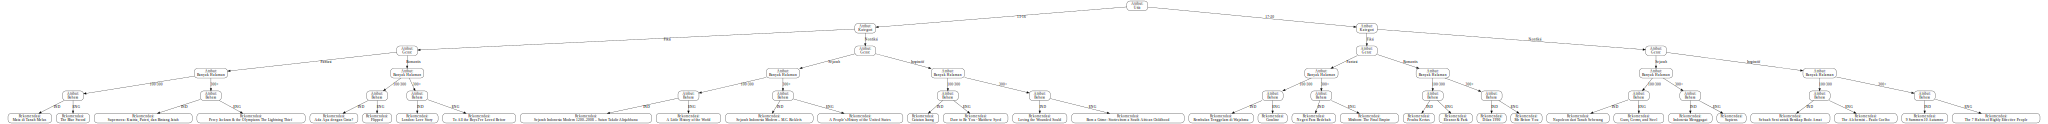

In [ ]:
# Contoh struktur tree
root = TreeNode(atribut="Usia")

kategori1 = TreeNode(atribut="Kategori")
kategori2 = TreeNode(atribut="Kategori")

root.add_branch("13-16", kategori1)
root.add_branch("17-20", kategori2)

genre1 = TreeNode(atribut="Genre")
genre2 = TreeNode(atribut="Genre")
genre3 = TreeNode(atribut="Genre")
genre4 = TreeNode(atribut="Genre")

kategori1.add_branch("Fiksi", genre1)
kategori1.add_branch("Nonfiksi", genre2)
kategori2.add_branch("Fiksi", genre3)
kategori2.add_branch("Nonfiksi", genre4)

halaman1 = TreeNode(atribut="Banyak Halaman")
halaman2 = TreeNode(atribut="Banyak Halaman")
halaman3 = TreeNode(atribut="Banyak Halaman")
halaman4 = TreeNode(atribut="Banyak Halaman")
halaman5 = TreeNode(atribut="Banyak Halaman")
halaman6 = TreeNode(atribut="Banyak Halaman")
halaman7 = TreeNode(atribut="Banyak Halaman")
halaman8 = TreeNode(atribut="Banyak Halaman")

genre1.add_branch("Fantasi", halaman1)
genre1.add_branch("Romantis", halaman2)
genre2.add_branch("Sejarah", halaman3)
genre2.add_branch("Inspiratif", halaman4)
genre3.add_branch("Fantasi", halaman5)
genre3.add_branch("Romantis", halaman6)
genre4.add_branch("Sejarah", halaman7)
genre4.add_branch("Inspiratif", halaman8)


bahasa1 = TreeNode(atribut="Bahasa")
bahasa2 = TreeNode(atribut="Bahasa")
bahasa3 = TreeNode(atribut="Bahasa")
bahasa4 = TreeNode(atribut="Bahasa")
bahasa5 = TreeNode(atribut="Bahasa")
bahasa6 = TreeNode(atribut="Bahasa")
bahasa7 = TreeNode(atribut="Bahasa")
bahasa8 = TreeNode(atribut="Bahasa")
bahasa9 = TreeNode(atribut="Bahasa")
bahasa10 = TreeNode(atribut="Bahasa")
bahasa11 = TreeNode(atribut="Bahasa")
bahasa12 = TreeNode(atribut="Bahasa")
bahasa13 = TreeNode(atribut="Bahasa")
bahasa14 = TreeNode(atribut="Bahasa")
bahasa15 = TreeNode(atribut="Bahasa")
bahasa16 = TreeNode(atribut="Bahasa")

halaman1.add_branch("100-300", bahasa1)
halaman1.add_branch("300+", bahasa2)

halaman2.add_branch("100-300", bahasa3)
halaman2.add_branch("300+", bahasa4)

halaman3.add_branch("100-300", bahasa5)
halaman3.add_branch("300+", bahasa6)

halaman4.add_branch("100-300", bahasa7)
halaman4.add_branch("300+", bahasa8)

halaman5.add_branch("100-300", bahasa9)
halaman5.add_branch("300+", bahasa10)

halaman6.add_branch("100-300", bahasa11)
halaman6.add_branch("300+", bahasa12)

halaman7.add_branch("100-300", bahasa13)
halaman7.add_branch("300+", bahasa14)

halaman8.add_branch("100-300", bahasa15)
halaman8.add_branch("300+", bahasa16)

rekomendasi1 = TreeNode(is_leaf=True, rekomendasi="Mata di Tanah Melus")
rekomendasi2 = TreeNode(is_leaf=True, rekomendasi="The Blue Sword")
rekomendasi3 = TreeNode(is_leaf=True, rekomendasi="Supernova: Ksatria, Puteri, dan Bintang Jatuh")
rekomendasi4 = TreeNode(is_leaf=True, rekomendasi="Percy Jackson & the Olympians: The Lightning Thief")
rekomendasi5 = TreeNode(is_leaf=True, rekomendasi="Ada Apa dengan Cinta?")
rekomendasi6 = TreeNode(is_leaf=True, rekomendasi="Flipped")
rekomendasi7 = TreeNode(is_leaf=True, rekomendasi="London: Love Story")
rekomendasi8 = TreeNode(is_leaf=True, rekomendasi="To All the Boys I’ve Loved Before")
rekomendasi9 = TreeNode(is_leaf=True, rekomendasi="Sejarah Indonesia Modern 1200–2008 – Sutan Takdir Alisjahbana")
rekomendasi10 = TreeNode(is_leaf=True, rekomendasi="A Little History of the World")
rekomendasi11 = TreeNode(is_leaf=True, rekomendasi="Sejarah Indonesia Modern – M.C. Ricklefs")
rekomendasi12 = TreeNode(is_leaf=True, rekomendasi="A People's History of the United States")
rekomendasi13 = TreeNode(is_leaf=True, rekomendasi="Catatan Juang")
rekomendasi14 = TreeNode(is_leaf=True, rekomendasi="Dare to Be You - Matthew Syed")
rekomendasi15 = TreeNode(is_leaf=True, rekomendasi="Loving the Wounded Sould")
rekomendasi16 = TreeNode(is_leaf=True, rekomendasi="Born a Crime: Stories from a South African Childhood")
rekomendasi17 = TreeNode(is_leaf=True, rekomendasi="Rembulan Tenggelam di Wajahmu")
rekomendasi18 = TreeNode(is_leaf=True, rekomendasi="Coraline")
rekomendasi19 = TreeNode(is_leaf=True, rekomendasi="Negeri Para Bedebah")
rekomendasi20 = TreeNode(is_leaf=True, rekomendasi="Mistborn: The Final Empire")
rekomendasi21 = TreeNode(is_leaf=True, rekomendasi="Perahu Kertas")
rekomendasi22 = TreeNode(is_leaf=True, rekomendasi="Eleanor & Park")
rekomendasi23 = TreeNode(is_leaf=True, rekomendasi="Dilan 1990")
rekomendasi24 = TreeNode(is_leaf=True, rekomendasi="Me Before You")
rekomendasi25 = TreeNode(is_leaf=True, rekomendasi="Napoleon dari Tanah Seberang")
rekomendasi26 = TreeNode(is_leaf=True, rekomendasi="Guns, Germs, and Steel")
rekomendasi27 = TreeNode(is_leaf=True, rekomendasi="Indonesia Menggugat")
rekomendasi28 = TreeNode(is_leaf=True, rekomendasi="Sapiens")
rekomendasi29 = TreeNode(is_leaf=True, rekomendasi="Sebuah Seni untuk Bersikap Bodo Amat")
rekomendasi30 = TreeNode(is_leaf=True, rekomendasi="The Alchemist – Paulo Coelho")
rekomendasi31 = TreeNode(is_leaf=True, rekomendasi="9 Summers 10 Autumns")
rekomendasi32 = TreeNode(is_leaf=True, rekomendasi="The 7 Habits of Highly Effective People ")

bahasa1.add_branch("IND", rekomendasi1)
bahasa1.add_branch("ENG", rekomendasi2)

bahasa2.add_branch("IND", rekomendasi3)
bahasa2.add_branch("ENG", rekomendasi4)

bahasa3.add_branch("IND", rekomendasi5)
bahasa3.add_branch("ENG", rekomendasi6)

bahasa4.add_branch("IND", rekomendasi7)
bahasa4.add_branch("ENG", rekomendasi8)

bahasa5.add_branch("IND", rekomendasi9)
bahasa5.add_branch("ENG", rekomendasi10)

bahasa6.add_branch("IND", rekomendasi11)
bahasa6.add_branch("ENG", rekomendasi12)

bahasa7.add_branch("IND", rekomendasi13)
bahasa7.add_branch("ENG", rekomendasi14)

bahasa8.add_branch("IND", rekomendasi15)
bahasa8.add_branch("ENG", rekomendasi16)

bahasa9.add_branch("IND", rekomendasi17)
bahasa9.add_branch("ENG", rekomendasi18)

bahasa10.add_branch("IND", rekomendasi19)
bahasa10.add_branch("ENG", rekomendasi20)

bahasa11.add_branch("IND", rekomendasi21)
bahasa11.add_branch("ENG", rekomendasi22)

bahasa12.add_branch("IND", rekomendasi23)
bahasa12.add_branch("ENG", rekomendasi24)

bahasa13.add_branch("IND", rekomendasi25)
bahasa13.add_branch("ENG", rekomendasi26)

bahasa14.add_branch("IND", rekomendasi27)
bahasa14.add_branch("ENG", rekomendasi28)

bahasa15.add_branch("IND", rekomendasi29)
bahasa15.add_branch("ENG", rekomendasi30)

bahasa16.add_branch("IND", rekomendasi31)
bahasa16.add_branch("ENG", rekomendasi32)


# Visualisasi dan tampilkan langsung di Colab
tree_diagram = visualize_tree(root)
tree_diagram



Selamat datang di sistem rekomendasi buku!

Pilih usia:
1. 13-16
2. 17-20
Pilih angka: 1
Pilih kategori buku:
1. Fiksi
2. Nonfiksi
Pilih angka: 2
Pilih genre:
1. Sejarah
2. Inspiratif
Pilih angka: 1
Pilih banyak halaman:
1. 100-300
2. 300+
Pilih angka: 2
Pilih bahasa:
1. IND
2. ENG
Pilih angka: 1

Rekomendasi buku untuk kamu: Sejarah Indonesia Modern – M.C. Ricklefs


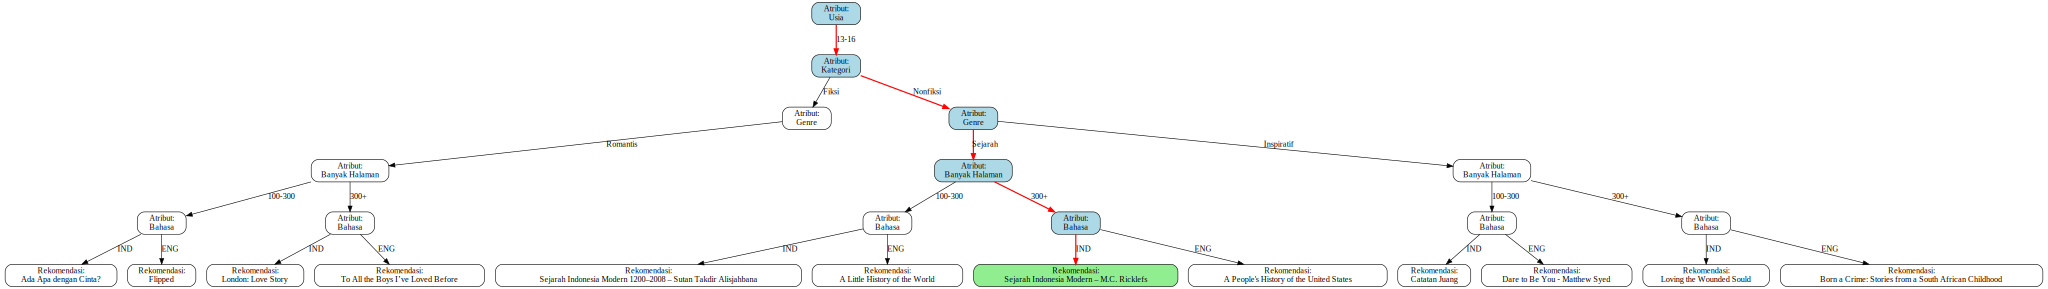

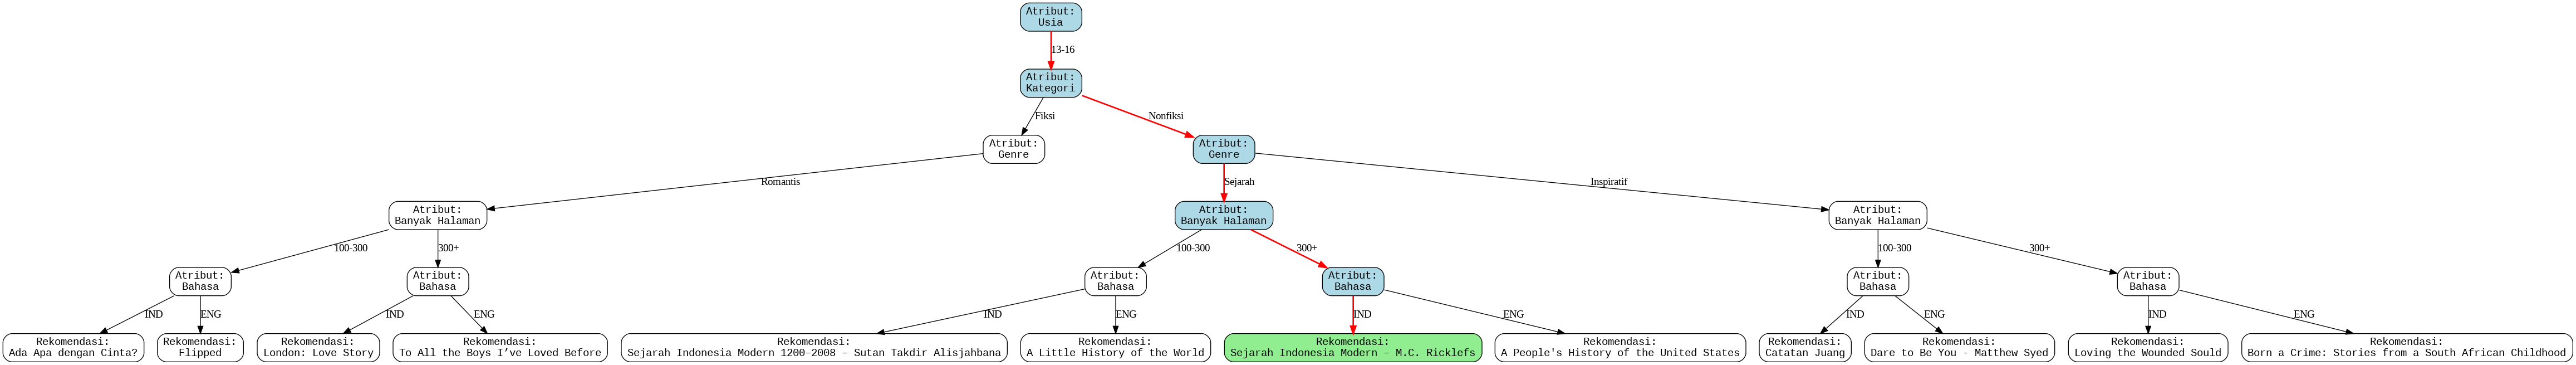

In [ ]:
from graphviz import Digraph
from IPython.display import display

class TreeNode:
    def __init__(self, atribut=None, is_leaf=False, rekomendasi=None):
        self.atribut = atribut
        self.is_leaf = is_leaf
        self.rekomendasi = rekomendasi
        self.branches = {}

    def add_branch(self, value, node):
        self.branches[value] = node

def get_path(node, user_input):
    path = [node]
    current = node
    while not current.is_leaf:
        atribut = current.atribut
        value = user_input.get(atribut)
        if value not in current.branches:
            break
        current = current.branches[value]
        path.append(current)
    return path

def visualize_tree_with_highlight(node, path=[], dot=None, parent=None, edge_label=""):
    if dot is None:
        dot = Digraph()
        dot.attr('node', shape='box',style='rounded', fontname='Times New Roman')

    node_id = str(id(node))
    label = f"Rekomendasi:\n{node.rekomendasi}" if node.is_leaf else f"Atribut:\n{node.atribut}"

    if node in path:
        color = 'lightblue' if not node.is_leaf else 'lightgreen'
        dot.node(node_id, label, style='filled, rounded', fillcolor=color)
    else:
        dot.node(node_id, label)

    if parent:
        if node in path:
            dot.edge(parent, node_id, label=edge_label, color='red', penwidth='2')
        else:
            dot.edge(parent, node_id, label=edge_label)

    for value, child in node.branches.items():
        visualize_tree_with_highlight(child, path, dot, node_id, str(value))

    return dot

def input_with_options(prompt, options_dict):
    while True:
        print(prompt)
        for key, value in options_dict.items():
            print(f"{key}. {value}")
        choice = input("Pilih angka: ").strip()
        if choice in options_dict:
            return options_dict[choice]
        else:
            print("⚠️ Pilihan tidak valid. Silakan coba lagi.\n")
root = TreeNode(atribut="Usia")

kategori1 = TreeNode(atribut="Kategori")
kategori2 = TreeNode(atribut="Kategori")

root.add_branch("13-16", kategori1)

genre1 = TreeNode(atribut="Genre")
genre2 = TreeNode(atribut="Genre")
genre3 = TreeNode(atribut="Genre")
genre4 = TreeNode(atribut="Genre")

kategori1.add_branch("Fiksi", genre1)
kategori1.add_branch("Nonfiksi", genre2)
kategori2.add_branch("Fiksi", genre3)
kategori2.add_branch("Nonfiksi", genre4)

halaman1 = TreeNode(atribut="Banyak Halaman")
halaman2 = TreeNode(atribut="Banyak Halaman")
halaman3 = TreeNode(atribut="Banyak Halaman")
halaman4 = TreeNode(atribut="Banyak Halaman")
halaman5 = TreeNode(atribut="Banyak Halaman")
halaman6 = TreeNode(atribut="Banyak Halaman")
halaman7 = TreeNode(atribut="Banyak Halaman")
halaman8 = TreeNode(atribut="Banyak Halaman")

genre1.add_branch("Romantis", halaman2)
genre2.add_branch("Sejarah", halaman3)
genre2.add_branch("Inspiratif", halaman4)
genre3.add_branch("Fantasi", halaman5)
genre3.add_branch("Romantis", halaman6)
genre4.add_branch("Sejarah", halaman7)
genre4.add_branch("Inspiratif", halaman8)


bahasa1 = TreeNode(atribut="Bahasa")
bahasa2 = TreeNode(atribut="Bahasa")
bahasa3 = TreeNode(atribut="Bahasa")
bahasa4 = TreeNode(atribut="Bahasa")
bahasa5 = TreeNode(atribut="Bahasa")
bahasa6 = TreeNode(atribut="Bahasa")
bahasa7 = TreeNode(atribut="Bahasa")
bahasa8 = TreeNode(atribut="Bahasa")
bahasa9 = TreeNode(atribut="Bahasa")
bahasa10 = TreeNode(atribut="Bahasa")
bahasa11 = TreeNode(atribut="Bahasa")
bahasa12 = TreeNode(atribut="Bahasa")
bahasa13 = TreeNode(atribut="Bahasa")
bahasa14 = TreeNode(atribut="Bahasa")
bahasa15 = TreeNode(atribut="Bahasa")
bahasa16 = TreeNode(atribut="Bahasa")

halaman1.add_branch("100-300", bahasa1)
halaman1.add_branch("300+", bahasa2)

halaman2.add_branch("100-300", bahasa3)
halaman2.add_branch("300+", bahasa4)

halaman3.add_branch("100-300", bahasa5)
halaman3.add_branch("300+", bahasa6)

halaman4.add_branch("100-300", bahasa7)
halaman4.add_branch("300+", bahasa8)

halaman5.add_branch("100-300", bahasa9)
halaman5.add_branch("300+", bahasa10)

halaman6.add_branch("100-300", bahasa11)
halaman6.add_branch("300+", bahasa12)

halaman7.add_branch("100-300", bahasa13)
halaman7.add_branch("300+", bahasa14)

halaman8.add_branch("100-300", bahasa15)
halaman8.add_branch("300+", bahasa16)

rekomendasi1 = TreeNode(is_leaf=True, rekomendasi="Mata di Tanah Melus")
rekomendasi2 = TreeNode(is_leaf=True, rekomendasi="The Blue Sword")
rekomendasi3 = TreeNode(is_leaf=True, rekomendasi="Supernova: Ksatria, Puteri, dan Bintang Jatuh")
rekomendasi4 = TreeNode(is_leaf=True, rekomendasi="Percy Jackson & the Olympians: The Lightning Thief")
rekomendasi5 = TreeNode(is_leaf=True, rekomendasi="Ada Apa dengan Cinta?")
rekomendasi6 = TreeNode(is_leaf=True, rekomendasi="Flipped")
rekomendasi7 = TreeNode(is_leaf=True, rekomendasi="London: Love Story")
rekomendasi8 = TreeNode(is_leaf=True, rekomendasi="To All the Boys I’ve Loved Before")
rekomendasi9 = TreeNode(is_leaf=True, rekomendasi="Sejarah Indonesia Modern 1200–2008 – Sutan Takdir Alisjahbana")
rekomendasi10 = TreeNode(is_leaf=True, rekomendasi="A Little History of the World")
rekomendasi11 = TreeNode(is_leaf=True, rekomendasi="Sejarah Indonesia Modern – M.C. Ricklefs")
rekomendasi12 = TreeNode(is_leaf=True, rekomendasi="A People's History of the United States")
rekomendasi13 = TreeNode(is_leaf=True, rekomendasi="Catatan Juang")
rekomendasi14 = TreeNode(is_leaf=True, rekomendasi="Dare to Be You - Matthew Syed")
rekomendasi15 = TreeNode(is_leaf=True, rekomendasi="Loving the Wounded Sould")
rekomendasi16 = TreeNode(is_leaf=True, rekomendasi="Born a Crime: Stories from a South African Childhood")
rekomendasi17 = TreeNode(is_leaf=True, rekomendasi="Rembulan Tenggelam di Wajahmu")
rekomendasi18 = TreeNode(is_leaf=True, rekomendasi="Coraline")
rekomendasi19 = TreeNode(is_leaf=True, rekomendasi="Negeri Para Bedebah")
rekomendasi20 = TreeNode(is_leaf=True, rekomendasi="Mistborn: The Final Empire")
rekomendasi21 = TreeNode(is_leaf=True, rekomendasi="Perahu Kertas")
rekomendasi22 = TreeNode(is_leaf=True, rekomendasi="Eleanor & Park")
rekomendasi23 = TreeNode(is_leaf=True, rekomendasi="Dilan 1990")
rekomendasi24 = TreeNode(is_leaf=True, rekomendasi="Me Before You")
rekomendasi25 = TreeNode(is_leaf=True, rekomendasi="Napoleon dari Tanah Seberang")
rekomendasi26 = TreeNode(is_leaf=True, rekomendasi="Guns, Germs, and Steel")
rekomendasi27 = TreeNode(is_leaf=True, rekomendasi="Indonesia Menggugat")
rekomendasi28 = TreeNode(is_leaf=True, rekomendasi="Sapiens")
rekomendasi29 = TreeNode(is_leaf=True, rekomendasi="Sebuah Seni untuk Bersikap Bodo Amat")
rekomendasi30 = TreeNode(is_leaf=True, rekomendasi="The Alchemist – Paulo Coelho")
rekomendasi31 = TreeNode(is_leaf=True, rekomendasi="9 Summers 10 Autumns")
rekomendasi32 = TreeNode(is_leaf=True, rekomendasi="The 7 Habits of Highly Effective People ")

bahasa1.add_branch("IND", rekomendasi1)
bahasa1.add_branch("ENG", rekomendasi2)

bahasa2.add_branch("IND", rekomendasi3)
bahasa2.add_branch("ENG", rekomendasi4)

bahasa3.add_branch("IND", rekomendasi5)
bahasa3.add_branch("ENG", rekomendasi6)

bahasa4.add_branch("IND", rekomendasi7)
bahasa4.add_branch("ENG", rekomendasi8)

bahasa5.add_branch("IND", rekomendasi9)
bahasa5.add_branch("ENG", rekomendasi10)

bahasa6.add_branch("IND", rekomendasi11)
bahasa6.add_branch("ENG", rekomendasi12)

bahasa7.add_branch("IND", rekomendasi13)
bahasa7.add_branch("ENG", rekomendasi14)

bahasa8.add_branch("IND", rekomendasi15)
bahasa8.add_branch("ENG", rekomendasi16)

bahasa9.add_branch("IND", rekomendasi17)
bahasa9.add_branch("ENG", rekomendasi18)

bahasa10.add_branch("IND", rekomendasi19)
bahasa10.add_branch("ENG", rekomendasi20)

bahasa11.add_branch("IND", rekomendasi21)
bahasa11.add_branch("ENG", rekomendasi22)

bahasa12.add_branch("IND", rekomendasi23)
bahasa12.add_branch("ENG", rekomendasi24)

bahasa13.add_branch("IND", rekomendasi25)
bahasa13.add_branch("ENG", rekomendasi26)

bahasa14.add_branch("IND", rekomendasi27)
bahasa14.add_branch("ENG", rekomendasi28)

bahasa15.add_branch("IND", rekomendasi29)
bahasa15.add_branch("ENG", rekomendasi30)

bahasa16.add_branch("IND", rekomendasi31)
bahasa16.add_branch("ENG", rekomendasi32)


print("Selamat datang di sistem rekomendasi buku!\n")

usia_dict = {
    "1": "13-16",
    "2": "17-20"
}
usia = input_with_options("Pilih usia:", usia_dict)

kategori_dict = {
    "1": "Fiksi",
    "2": "Nonfiksi"
}
kategori = input_with_options("Pilih kategori buku:", kategori_dict)

if kategori == "Fiksi":
    genre_dict = {
        "1": "Fantasi",
        "2": "Romantis"
    }
else:
    genre_dict = {
        "1": "Sejarah",
        "2": "Inspiratif"
    }
genre = input_with_options("Pilih genre:", genre_dict)

halaman_dict = {
    "1": "100-300",
    "2": "300+"
}
halaman = input_with_options("Pilih banyak halaman:", halaman_dict)

bahasa_dict = {
    "1": "IND",
    "2": "ENG"
}
bahasa = input_with_options("Pilih bahasa:", bahasa_dict)

user_input = {
    "Usia": usia,
    "Kategori": kategori,
    "Genre": genre,
    "Banyak Halaman": halaman,
    "Bahasa": bahasa
}

path = get_path(root, user_input)
if path and path[-1].is_leaf:
    print(f"\n\033[1mRekomendasi buku untuk kamu: {path[-1].rekomendasi}\033[0m")
else:
    print("\n Jawaban tidak cocok dengan data di tree.")

tree = visualize_tree_with_highlight(root, path)
display(tree)
tree.render('pohon_keputusan_studi_kasus', format='png')

from IPython.display import Image
Image(filename='pohon_keputusan_studi_kasus.png')



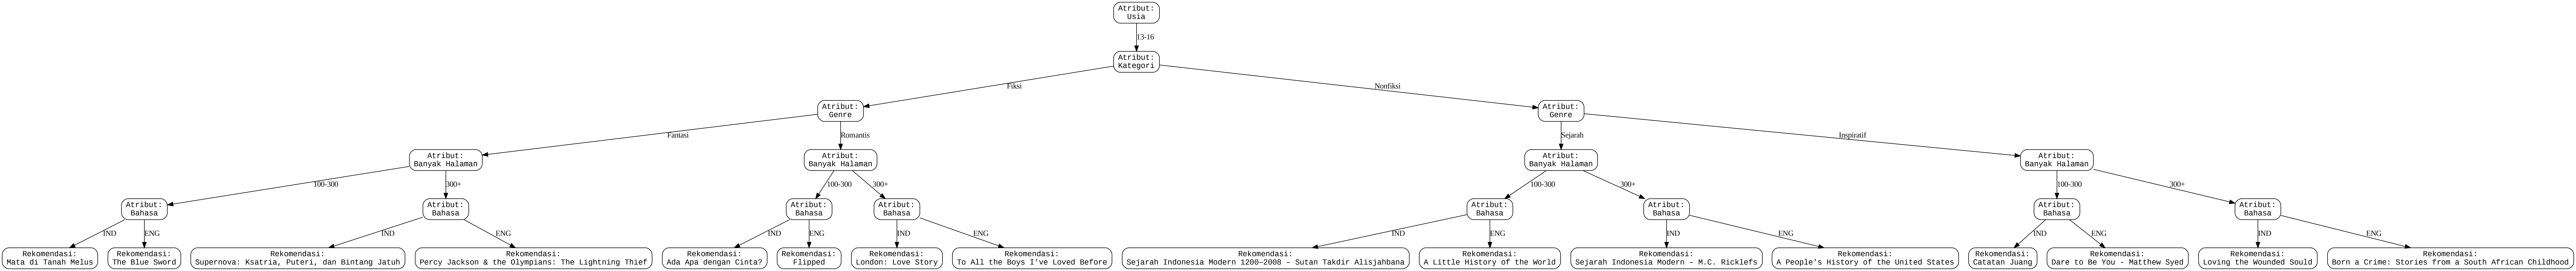

In [ ]:
# Contoh struktur tree
root = TreeNode(atribut="Usia")

kategori1 = TreeNode(atribut="Kategori")
kategori2 = TreeNode(atribut="Kategori")
kategori3 = TreeNode(atribut="Kategori")

root.add_branch("13-16", kategori2)


genre1 = TreeNode(atribut="Genre")
genre2 = TreeNode(atribut="Genre")


kategori2.add_branch("Fiksi", genre1)
kategori2.add_branch("Nonfiksi", genre2)


halaman1 = TreeNode(atribut="Banyak Halaman")
halaman2 = TreeNode(atribut="Banyak Halaman")
halaman3 = TreeNode(atribut="Banyak Halaman")
halaman4 = TreeNode(atribut="Banyak Halaman")

genre1.add_branch("Fantasi", halaman1)
genre1.add_branch("Romantis", halaman2)
genre2.add_branch("Sejarah", halaman3)
genre2.add_branch("Inspiratif", halaman4)


bahasa1 = TreeNode(atribut="Bahasa")
bahasa2 = TreeNode(atribut="Bahasa")
bahasa3 = TreeNode(atribut="Bahasa")
bahasa4 = TreeNode(atribut="Bahasa")
bahasa5 = TreeNode(atribut="Bahasa")
bahasa6 = TreeNode(atribut="Bahasa")
bahasa7 = TreeNode(atribut="Bahasa")
bahasa8 = TreeNode(atribut="Bahasa")


halaman1.add_branch("100-300", bahasa1)
halaman1.add_branch("300+", bahasa2)

halaman2.add_branch("100-300", bahasa3)
halaman2.add_branch("300+", bahasa4)

halaman3.add_branch("100-300", bahasa5)
halaman3.add_branch("300+", bahasa6)

halaman4.add_branch("100-300", bahasa7)
halaman4.add_branch("300+", bahasa8)


rekomendasi1 = TreeNode(is_leaf=True, rekomendasi="Mata di Tanah Melus")
rekomendasi2 = TreeNode(is_leaf=True, rekomendasi="The Blue Sword")
rekomendasi3 = TreeNode(is_leaf=True, rekomendasi="Supernova: Ksatria, Puteri, dan Bintang Jatuh")
rekomendasi4 = TreeNode(is_leaf=True, rekomendasi="Percy Jackson & the Olympians: The Lightning Thief")
rekomendasi5 = TreeNode(is_leaf=True, rekomendasi="Ada Apa dengan Cinta?")
rekomendasi6 = TreeNode(is_leaf=True, rekomendasi="Flipped")
rekomendasi7 = TreeNode(is_leaf=True, rekomendasi="London: Love Story")
rekomendasi8 = TreeNode(is_leaf=True, rekomendasi="To All the Boys I’ve Loved Before")
rekomendasi9 = TreeNode(is_leaf=True, rekomendasi="Sejarah Indonesia Modern 1200–2008 – Sutan Takdir Alisjahbana")
rekomendasi10 = TreeNode(is_leaf=True, rekomendasi="A Little History of the World")
rekomendasi11 = TreeNode(is_leaf=True, rekomendasi="Sejarah Indonesia Modern – M.C. Ricklefs")
rekomendasi12 = TreeNode(is_leaf=True, rekomendasi="A People's History of the United States")
rekomendasi13 = TreeNode(is_leaf=True, rekomendasi="Catatan Juang")
rekomendasi14 = TreeNode(is_leaf=True, rekomendasi="Dare to Be You - Matthew Syed")
rekomendasi15 = TreeNode(is_leaf=True, rekomendasi="Loving the Wounded Sould")
rekomendasi16 = TreeNode(is_leaf=True, rekomendasi="Born a Crime: Stories from a South African Childhood")

bahasa1.add_branch("IND", rekomendasi1)
bahasa1.add_branch("ENG", rekomendasi2)

bahasa2.add_branch("IND", rekomendasi3)
bahasa2.add_branch("ENG", rekomendasi4)

bahasa3.add_branch("IND", rekomendasi5)
bahasa3.add_branch("ENG", rekomendasi6)

bahasa4.add_branch("IND", rekomendasi7)
bahasa4.add_branch("ENG", rekomendasi8)

bahasa5.add_branch("IND", rekomendasi9)
bahasa5.add_branch("ENG", rekomendasi10)

bahasa6.add_branch("IND", rekomendasi11)
bahasa6.add_branch("ENG", rekomendasi12)

bahasa7.add_branch("IND", rekomendasi13)
bahasa7.add_branch("ENG", rekomendasi14)

bahasa8.add_branch("IND", rekomendasi15)
bahasa8.add_branch("ENG", rekomendasi16)



# Visualisasi dan tampilkan langsung di Colab
tree_diagram = visualize_tree(root)
tree_diagram
tree_diagram.render('pohon_keputusan', format='png')

from IPython.display import Image
Image(filename='pohon_keputusan.png')

In [ ]:
!apt-get install -y graphviz
!pip install graphviz


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
graphviz is already the newest version (2.42.2-6ubuntu0.1).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.
